# Image Processing Fundamentals: Understanding FFT for Art Analysis

This tutorial will introduce you to the basics of image processing and FFT (Fast Fourier Transform) in the context of art analysis. We'll build concepts step-by-step with visual examples.

## What you'll learn:
1. Basic image loading and visualization
2. Understanding grayscale images
3. What is FFT and why it's useful
4. Analyzing art with FFT
5. Simple restoration techniques

## 1. Import Required Libraries

First, let's import the basic libraries we need:

In [1]:
# Import essential libraries
import cv2  # OpenCV for image processing
import numpy as np  # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for visualization
import os  # OS functions for file handling
from pathlib import Path  # Path manipulation

# Set up matplotlib for better display
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('ggplot')

## 2. Basic Image Loading and Display

Let's start by loading and displaying an image. This is the foundation of any image processing project.

In [2]:
# Function to load and display an image
def load_and_display(image_path, title="Image"):
    """Load and display an image from the given path"""
    # Read the image using OpenCV
    img = cv2.imread(image_path)
    
    # Check if the image was loaded successfully
    if img is None:
        print(f"Error: Could not load image at {image_path}")
        return None
    
    # OpenCV loads images in BGR format, convert to RGB for display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Display the image
    plt.figure()
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')  # Hide axes for better visualization
    plt.show()
    
    return img

Selected sample image: d:\R&D Project\image_processing\data/raw/AI_for_Art_Restoration_2/paired_dataset_art\damaged\1.png


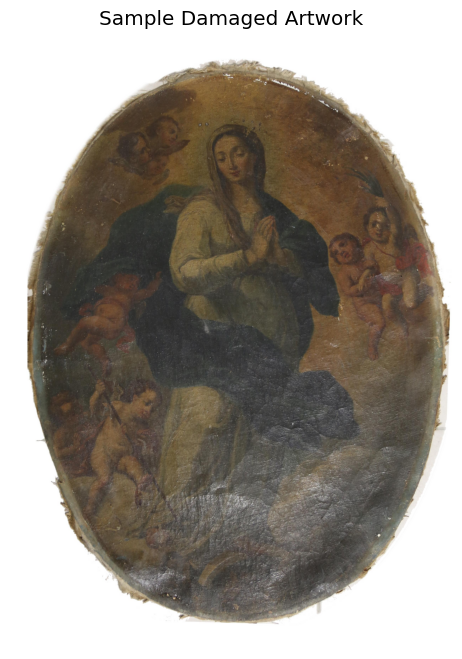

In [3]:
# Let's load a sample image from our dataset
# First, let's find an image path
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
data_path = os.path.join(project_root, "data/raw/AI_for_Art_Restoration_2/paired_dataset_art")
damaged_dir = os.path.join(data_path, "damaged")
undamaged_dir = os.path.join(data_path, "undamaged")

# List files in the damaged directory
damaged_files = os.listdir(damaged_dir)
if damaged_files:
    # Select the first image file
    sample_image_path = os.path.join(damaged_dir, damaged_files[0])
    print(f"Selected sample image: {sample_image_path}")
    
    # Load and display the image
    sample_img = load_and_display(sample_image_path, "Sample Damaged Artwork")
else:
    print("No image files found in the directory")

## 3. Understanding Grayscale Images

Most image processing operations, especially FFT, are performed on grayscale images. Let's convert our color image to grayscale.

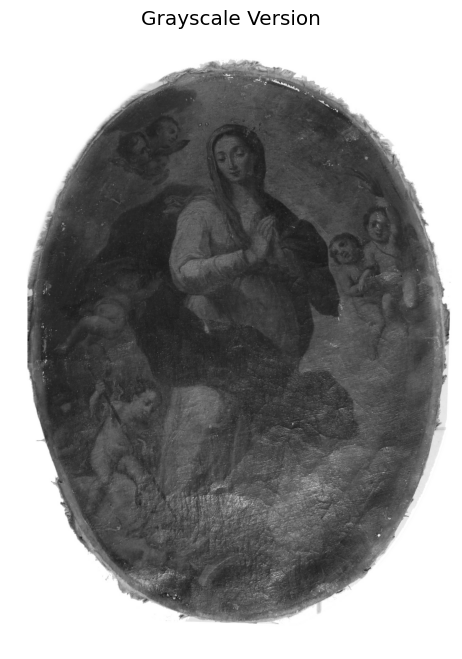

In [4]:
def convert_to_grayscale(img):
    """Convert an image to grayscale"""
    if len(img.shape) == 3:  # Check if image is color (3 channels)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:  # Image is already grayscale
        gray = img
    return gray

# Convert our sample image to grayscale
if sample_img is not None:
    gray_img = convert_to_grayscale(sample_img)
    
    # Display the grayscale image
    plt.figure()
    plt.imshow(gray_img, cmap='gray')
    plt.title("Grayscale Version")
    plt.axis('off')
    plt.show()

## 4. Introduction to Fast Fourier Transform (FFT)

The Fast Fourier Transform (FFT) is a mathematical technique that converts an image from its spatial domain to its frequency domain. In simpler terms:

- **Spatial domain**: What you see - the image itself with pixels
- **Frequency domain**: The patterns and variations in the image

Think of it like music:
- A song in the time domain is what you hear - the complete song
- The same song in the frequency domain shows the individual notes, instruments, and frequencies

### Why is FFT useful for image processing?
- It helps identify patterns and textures
- It makes it easier to remove certain types of noise
- It can reveal hidden features in the image

Let's apply FFT to our grayscale image:

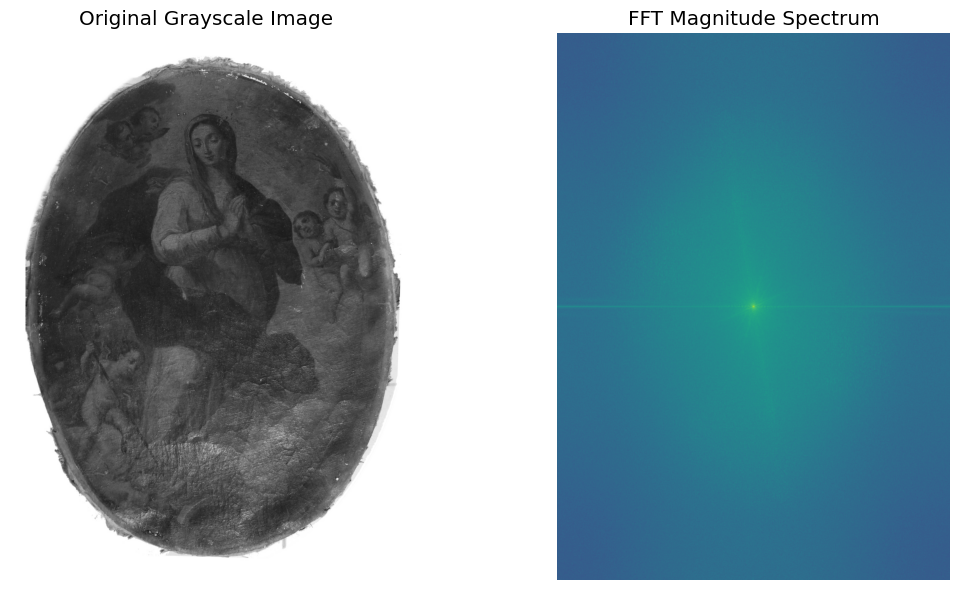

In [5]:
def compute_fft(img):
    """Compute the 2D FFT of an image"""
    # Ensure the image is grayscale
    gray = convert_to_grayscale(img)
    
    # Apply FFT - this converts the image to the frequency domain
    f = np.fft.fft2(gray)
    
    # Shift the zero frequency component to the center of the spectrum
    fshift = np.fft.fftshift(f)
    
    # Calculate magnitude spectrum (for visualization)
    # We apply log transform to enhance visualization
    magnitude = 20 * np.log(np.abs(fshift) + 1)
    
    return magnitude

# Compute FFT for our grayscale image
if sample_img is not None:
    magnitude_spectrum = compute_fft(sample_img)
    
    # Display the original grayscale image and its FFT magnitude spectrum
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(gray_img, cmap='gray')
    plt.title("Original Grayscale Image")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(magnitude_spectrum, cmap='viridis')
    plt.title("FFT Magnitude Spectrum")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

### Understanding the FFT Magnitude Spectrum

Let's break down what we're seeing in the FFT magnitude spectrum:

- **Center point**: Represents the average brightness (DC component) of the image
- **Points near center**: Low-frequency components - representing slow changes like background, large objects
- **Points far from center**: High-frequency components - representing rapid changes like edges, textures, and noise

Brighter points indicate stronger frequencies in the image.

## 5. Comparing Damaged and Undamaged Art

Now let's load a pair of damaged and undamaged artwork and compare their FFT spectrums to see the differences.

Selected image pair: 1.png


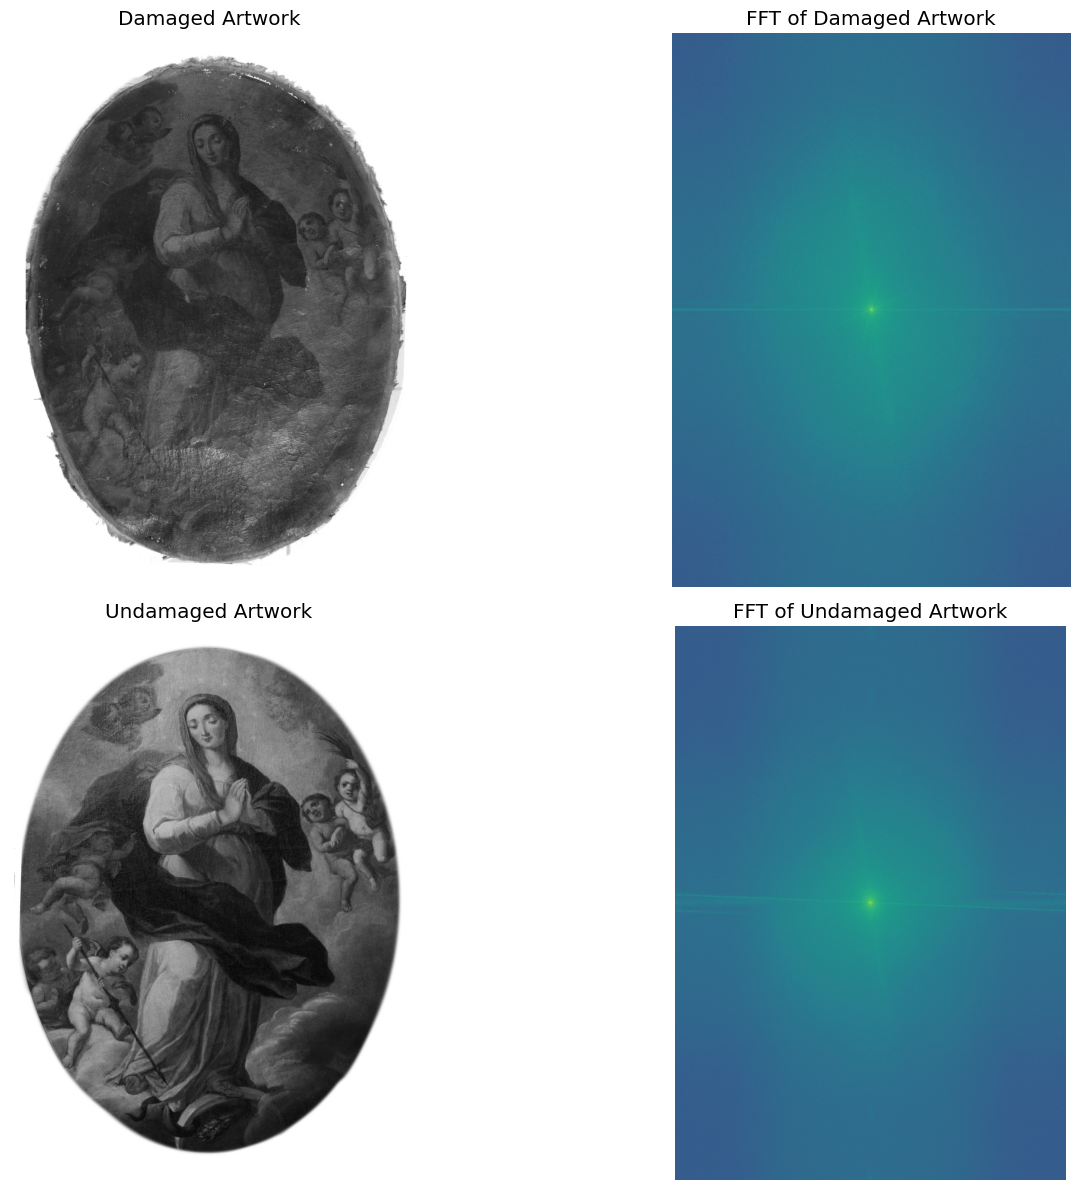

Image dimensions don't match, can't compute difference.


<Figure size 800x800 with 0 Axes>

In [6]:
# Find a pair of damaged and undamaged images with the same filename
damaged_dir = os.path.join(data_path, "damaged")
undamaged_dir = os.path.join(data_path, "undamaged")

# List files in both directories
damaged_files = os.listdir(damaged_dir)
undamaged_files = os.listdir(undamaged_dir)

# Find common files (same filename in both directories)
common_files = [f for f in damaged_files if f in undamaged_files]

if common_files:
    # Select the first common file
    sample_file = common_files[0]
    print(f"Selected image pair: {sample_file}")
    
    # Load both damaged and undamaged versions
    damaged_path = os.path.join(damaged_dir, sample_file)
    undamaged_path = os.path.join(undamaged_dir, sample_file)
    
    damaged_img = cv2.imread(damaged_path)
    undamaged_img = cv2.imread(undamaged_path)
    
    # Convert to grayscale
    damaged_gray = convert_to_grayscale(damaged_img)
    undamaged_gray = convert_to_grayscale(undamaged_img)
    
    # Compute FFT
    damaged_magnitude = compute_fft(damaged_gray)
    undamaged_magnitude = compute_fft(undamaged_gray)
    
    # Display images and their FFT spectrums
    plt.figure(figsize=(16, 12))
    
    # Damaged image and its FFT
    plt.subplot(2, 2, 1)
    plt.imshow(damaged_gray, cmap='gray')
    plt.title("Damaged Artwork")
    plt.axis('off')
    
    plt.subplot(2, 2, 2)
    plt.imshow(damaged_magnitude, cmap='viridis')
    plt.title("FFT of Damaged Artwork")
    plt.axis('off')
    
    # Undamaged image and its FFT
    plt.subplot(2, 2, 3)
    plt.imshow(undamaged_gray, cmap='gray')
    plt.title("Undamaged Artwork")
    plt.axis('off')
    
    plt.subplot(2, 2, 4)
    plt.imshow(undamaged_magnitude, cmap='viridis')
    plt.title("FFT of Undamaged Artwork")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Show the difference between the two FFT spectrums
    plt.figure(figsize=(8, 8))
    
    # Calculate absolute difference
    if damaged_magnitude.shape == undamaged_magnitude.shape:
        diff = np.abs(damaged_magnitude - undamaged_magnitude)
        plt.imshow(diff, cmap='hot')
        plt.colorbar(label='Difference Magnitude')
        plt.title("Difference Between Damaged and Undamaged FFT Spectrums")
        plt.axis('off')
        plt.show()
    else:
        print("Image dimensions don't match, can't compute difference.")
else:
    print("No matching files found in both damaged and undamaged directories")

## 6. Simple Restoration Using FFT

Now let's try a simple restoration technique using FFT filtering. This is a basic approach to removing noise or damage patterns from an image.

The idea is to:
1. Convert the image to the frequency domain
2. Apply a filter to remove certain frequencies (associated with damage)
3. Convert back to the spatial domain

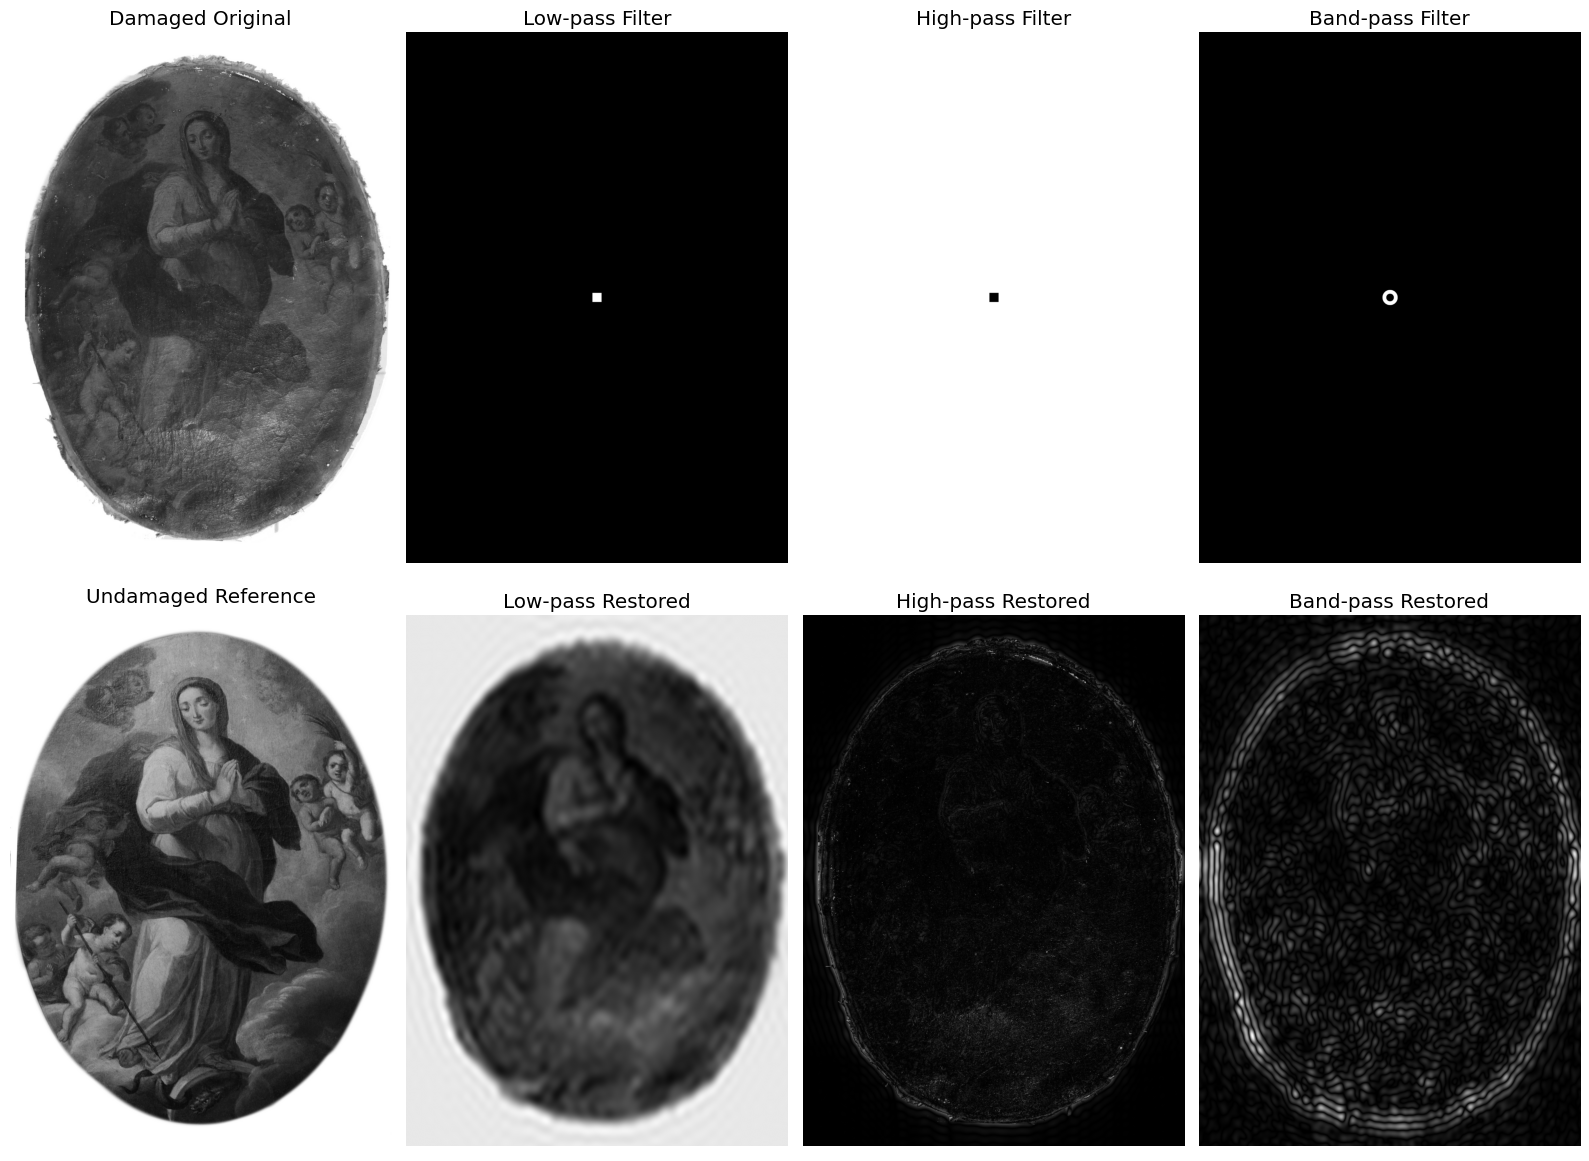

In [7]:
def simple_fft_restoration(img, filter_type='lowpass', cutoff=30):
    """Simple image restoration using FFT filtering"""
    # Convert to grayscale
    gray = convert_to_grayscale(img)
    
    # Get dimensions
    rows, cols = gray.shape
    crow, ccol = rows // 2, cols // 2  # Center coordinates
    
    # Apply FFT
    f = np.fft.fft2(gray)
    fshift = np.fft.fftshift(f)
    
    # Create filter mask based on the filter type
    mask = np.zeros((rows, cols), np.uint8)
    
    if filter_type == 'lowpass':
        # Low-pass filter - keeps low frequencies (center of spectrum)
        # This smooths the image and removes high-frequency noise
        mask[crow-cutoff:crow+cutoff, ccol-cutoff:ccol+cutoff] = 1
    elif filter_type == 'highpass':
        # High-pass filter - keeps high frequencies (edges of spectrum)
        # This enhances edges and details
        mask = np.ones((rows, cols), np.uint8)
        mask[crow-cutoff:crow+cutoff, ccol-cutoff:ccol+cutoff] = 0
    elif filter_type == 'bandpass':
        # Band-pass filter - keeps frequencies in a specific range
        inner_cutoff = cutoff // 2
        mask = np.zeros((rows, cols), np.uint8)
        cv2.circle(mask, (ccol, crow), cutoff, 1, -1)  # Outer circle
        cv2.circle(mask, (ccol, crow), inner_cutoff, 0, -1)  # Inner circle
    
    # Apply filter
    filtered_fshift = fshift * mask
    
    # Inverse FFT to get back to spatial domain
    f_ishift = np.fft.ifftshift(filtered_fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    
    # Normalize for better visualization
    img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    
    return img_back, mask

# Try different restoration filters on our damaged image
if 'damaged_gray' in locals():
    # Apply different filters
    restored_lowpass, lowpass_mask = simple_fft_restoration(damaged_gray, 'lowpass', cutoff=30)
    restored_highpass, highpass_mask = simple_fft_restoration(damaged_gray, 'highpass', cutoff=30)
    restored_bandpass, bandpass_mask = simple_fft_restoration(damaged_gray, 'bandpass', cutoff=50)
    
    # Display results
    plt.figure(figsize=(16, 12))
    
    # Original images
    plt.subplot(2, 4, 1)
    plt.imshow(damaged_gray, cmap='gray')
    plt.title("Damaged Original")
    plt.axis('off')
    
    plt.subplot(2, 4, 5)
    plt.imshow(undamaged_gray, cmap='gray')
    plt.title("Undamaged Reference")
    plt.axis('off')
    
    # Low-pass filter
    plt.subplot(2, 4, 2)
    plt.imshow(lowpass_mask, cmap='gray')
    plt.title("Low-pass Filter")
    plt.axis('off')
    
    plt.subplot(2, 4, 6)
    plt.imshow(restored_lowpass, cmap='gray')
    plt.title("Low-pass Restored")
    plt.axis('off')
    
    # High-pass filter
    plt.subplot(2, 4, 3)
    plt.imshow(highpass_mask, cmap='gray')
    plt.title("High-pass Filter")
    plt.axis('off')
    
    plt.subplot(2, 4, 7)
    plt.imshow(restored_highpass, cmap='gray')
    plt.title("High-pass Restored")
    plt.axis('off')
    
    # Band-pass filter
    plt.subplot(2, 4, 4)
    plt.imshow(bandpass_mask, cmap='gray')
    plt.title("Band-pass Filter")
    plt.axis('off')
    
    plt.subplot(2, 4, 8)
    plt.imshow(restored_bandpass, cmap='gray')
    plt.title("Band-pass Restored")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

## 7. Understanding the Results

Let's analyze the different filtered versions:

- **Low-pass filter**: This keeps only the low frequencies (center of the FFT spectrum). The result is a smoother image with less detail but also less noise and damage artifacts.

- **High-pass filter**: This keeps only the high frequencies (edges of the FFT spectrum). The result enhances edges and details but also noise.

- **Band-pass filter**: This keeps frequencies within a specific range, which can help preserve certain details while removing others.

### Which restoration is best?

Different types of damage require different approaches. In general:

- For scratches and fine lines, low-pass filtering helps
- For blurry images, high-pass filtering enhances details
- For specific periodic patterns, band-pass filtering can target those patterns

## 8. Building Features for Machine Learning

Let's extract some simple features from the FFT spectrum that could be used for machine learning (for forgery detection):

In [ ]:
def extract_fft_features(img):
    """Extract basic statistical features from FFT magnitude spectrum"""
    # Get FFT magnitude spectrum
    magnitude = compute_fft(img)
    
    # Calculate basic statistics
    mean = np.mean(magnitude)
    std = np.std(magnitude)
    min_val = np.min(magnitude)
    max_val = np.max(magnitude)
    
    # Calculate energy in different regions
    rows, cols = magnitude.shape
    crow, ccol = rows // 2, cols // 2
    
    # Center region (low frequencies)
    center_region = magnitude[crow-30:crow+30, ccol-30:ccol+30]
    center_energy = np.sum(center_region) / center_region.size
    
    # Edge region (high frequencies)
    # Create a mask for the edge region (everything except center)
    edge_mask = np.ones_like(magnitude)
    edge_mask[crow-30:crow+30, ccol-30:ccol+30] = 0
    edge_region = magnitude * edge_mask
    edge_energy = np.sum(edge_region) / np.count_nonzero(edge_mask)
    
    # Ratio of high to low frequency energy
    energy_ratio = edge_energy / center_energy if center_energy > 0 else 0
    
    # Return dictionary of features
    features = {
        'mean': mean,
        'std_dev': std,
        'min': min_val,
        'max': max_val,
        'center_energy': center_energy,
        'edge_energy': edge_energy,
        'energy_ratio': energy_ratio
    }
    
    return features

# Extract features from damaged and undamaged images
if 'damaged_gray' in locals() and 'undamaged_gray' in locals():
    damaged_features = extract_fft_features(damaged_gray)
    undamaged_features = extract_fft_features(undamaged_gray)
    
    # Display features in a table
    print("FFT Features Comparison:")
    print("-" * 50)
    print(f"{'Feature':<15} {'Damaged':>15} {'Undamaged':>15}")
    print("-" * 50)
    
    for key in damaged_features.keys():
        print(f"{key:<15} {damaged_features[key]:>15.4f} {undamaged_features[key]:>15.4f}")

## 9. Next Steps

Now that you understand the basics, here are some next steps to explore:

1. **Try more complex filters**: Experiment with different filter shapes and cutoffs
2. **Build a machine learning model**: Use the FFT features to classify images as damaged or undamaged
3. **Explore deep learning**: Consider using convolutional neural networks for more advanced restoration

## Conclusion

In this tutorial, you've learned:

- How to load and process images
- What FFT is and how to apply it to images
- How to compare damaged and undamaged artwork in the frequency domain
- Basic image restoration techniques using FFT filtering
- How to extract features for machine learning

These are the fundamental building blocks for more advanced art restoration and forgery detection techniques.